In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Length of train data
len(X_train)

60000

In [4]:
# Length of test data
len(X_test)

10000

In [5]:
# Shape of data
X_train.shape

(60000, 28, 28)

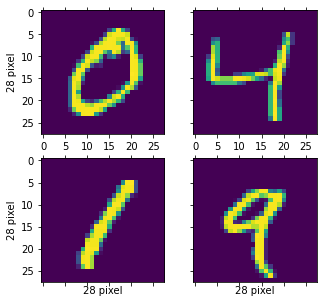

In [6]:
# Plotting some images of training dataset
r = 2
c = 2
diagram = 1
fig, axs = plt.subplots(r, c,figsize=(5,5))
for i in range(r):
    for j in range(c):
        axs[i][j].matshow(X_train[diagram])
        diagram+=1

for ax in axs.flat:
    ax.set(xlabel='28 pixel', ylabel='28 pixel')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [7]:
# Let's have a look at some y train values
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
# Scaling for better accuracy
X_train=X_train/255
X_test=X_test/255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4895 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3062 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2858 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2746 - accuracy: 0.9246
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2676 - accuracy: 0.9259


In [11]:
# Checking Accuracy with our Test Data
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2665 - accuracy: 0.9266


[0.2665340006351471, 0.9265999794006348]

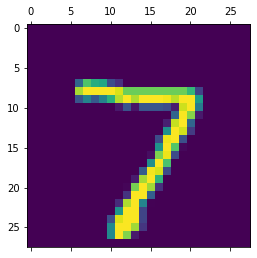

In [12]:
# Let's Predict value for 1st Image
plt.matshow(X_test[0])

In [13]:
y_predicted = model.predict(X_test_flattened)
np.argmax(y_predicted[0])
# Yaaahooo we got 7 as expected

7

In [14]:
#y_predicted is a whole values let's convert it to single value for all
y_predicted_labels = [np.argmax(val) for val in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [15]:
#Let's plot Confusion Matrix Now

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    4,    3,    0,    7,    7,    3,    2,    0],
       [   0, 1108,    4,    2,    0,    1,    4,    2,   14,    0],
       [   3,    5,  944,   16,    9,    3,   12,    8,   29,    3],
       [   1,    0,   21,  931,    1,   18,    2,    8,   20,    8],
       [   1,    1,    4,    1,  927,    0,    7,    3,    9,   29],
       [   7,    2,    8,   49,   12,  764,    8,    5,   29,    8],
       [   6,    3,   10,    1,    9,   14,  910,    2,    3,    0],
       [   1,    6,   25,    8,    8,    0,    0,  936,    3,   41],
       [   4,    6,   10,   25,   10,   22,    9,   11,  869,    8],
       [   7,    5,    2,   11,   32,    6,    0,   14,    9,  923]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

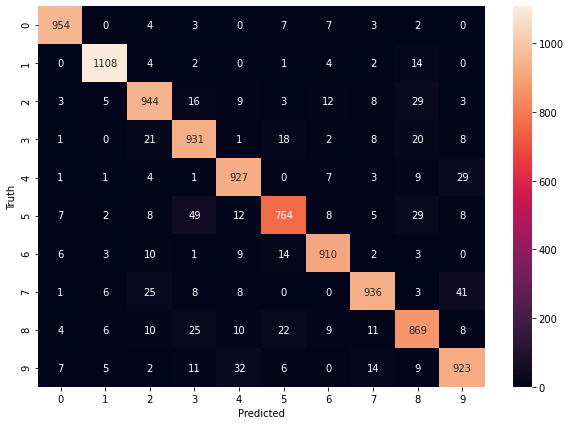

In [16]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
# Adding Hidden layer in Model to reduce ERRORS :) 
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2851 - accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1297 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0938 - accuracy: 0.9711
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0714 - accuracy: 0.9779
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0595 - accuracy: 0.9816


In [19]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0837 - accuracy: 0.9739


[0.08367569744586945, 0.9739000201225281]

Text(69.0, 0.5, 'Truth')

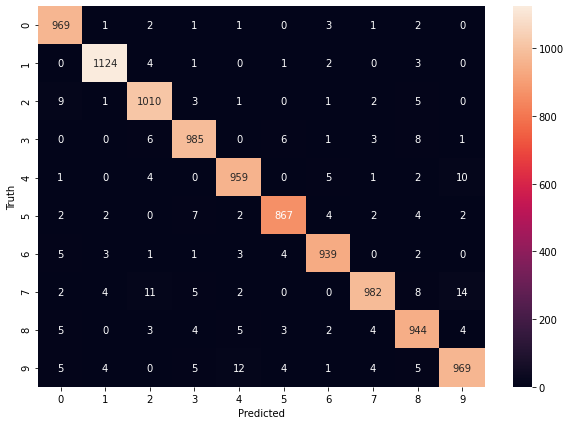

In [23]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(val) for val in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
# Yahooo Errors Reduces

In [27]:
# Wanna feel Lazy in flatting the array
# Not to worry bro, it comes with keras itself
# Let's use it
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2942 - accuracy: 0.9184
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1391 - accuracy: 0.9599
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0992 - accuracy: 0.9707
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0771 - accuracy: 0.9777
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0612 - accuracy: 0.9818


In [31]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0813 - accuracy: 0.9752


[0.0812985897064209, 0.9751999974250793]

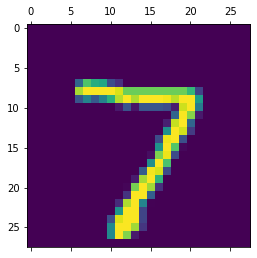

In [32]:
plt.matshow(X_test[0])

In [33]:
y = model.predict(X_test)
np.argmax(y[0])

7

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [37]:
import os
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(X_train, 
          y_train, 
          epochs=5,
         callbacks=[cp_callback])
# model.fit(train_images, 
#           train_labels,  
#           epochs=10,
#           validation_data=(test_images,test_labels),
#           callbacks=[cp_callback])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Epoch 1/5
1867/1875 [============================>.] - ETA: 0s - loss: 0.0501 - accuracy: 0.9850
Epoch 00001: saving model to training_1/cp.ckpt
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0501 - accuracy: 0.9850
Epoch 2/5
1871/1875 [============================>.] - ETA: 0s - loss: 0.0413 - accuracy: 0.9874
Epoch 00002: saving model to training_1/cp.ckpt
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0413 - accuracy: 0.9874
Epoch 3/5
1865/1875 [============================>.] - ETA: 0s - loss: 0.0347 - accuracy: 0.9895
Epoch 00003: saving model to training_1/cp.ckpt
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0347 - accuracy: 0.9895
Epoch 4/5
1868/1875 [============================>.] - ETA: 0s - loss: 0.0292 - accuracy: 0.9913
Epoch 00004: saving model to training_1/cp.ckpt
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0291 - accuracy: 0.9912
Epoch 5/5
1865/1875 [============================>.] - E

In [43]:
# Loads the weights
checkpoint_path = './training_1/cp.ckpt'
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss,acc = model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 0.0875 - accuracy: 0.9775
Restored model, accuracy: 97.75%


In [44]:
# Create and train a new model instance.
# model = create_model()
# model.fit(train_images, train_labels, epochs=5)

# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [45]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

my_model
assets	saved_model.pb	variables


In [46]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate the restored model
loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

print(new_model.predict(X_test).shape)